In [17]:
%matplotlib inline

import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import os
import os.path

In [18]:
scenarios_folder = os.path.expanduser('~/Developer/interscsimulator/mock-simulators/smart_city_model/digital-rails-scenarios/')
dr_events_filename_template = scenarios_folder + '{}/arrivals.xml'

In [19]:
def parse_arrivals(filename, prefix=''):
    tree = ET.parse(filename)
    root = tree.getroot()

    events = []
    for child in root:        
        if (len(prefix) == 0 or (prefix in child.attrib['person'])):
            trip_time = int(child.attrib['trip_time'])
            distance = int(child.attrib['distance'])

            events.append({'trip_time_s': trip_time, 'distance_m': distance})

    return pd.DataFrame(events)

# All cars (DR + regular)

In [20]:
trip_time_stats = []
avg_speed_stats = []


scenarios = [
    'peak_cet_0_0',
    'peak_dr_algo_0_0',
    'peak_dr_algo_1_0',
    'peak_dr_algo_1_5',
    'peak_dr_algo_1_10',
    'peak_dr_algo_1_15',
    'peak_dr_algo_1_20',
    'peak_dr_algo_1_25',
    'peak_dr_algo_1_30',
    'peak_dr_algo_1_35',
    'peak_dr_algo_1_40',
    'peak_dr_algo_1_45',
    'peak_dr_algo_1_50',
    'peak_dr_algo_1_55',
    'peak_dr_algo_1_60',
    'peak_dr_algo_1_65',
    'peak_dr_algo_1_70',
    'peak_dr_algo_1_75',
    'peak_dr_algo_1_80',
    'peak_dr_algo_1_85',
    'peak_dr_algo_1_90',
    'peak_dr_algo_1_95',
    'peak_dr_algo_1_100'
]

for s in scenarios:
    dr = parse_arrivals(dr_events_filename_template.format(s))
    dr['avg_speed_km/h'] = 3.6 * dr['distance_m'] / dr['trip_time_s']
    dr = dr.drop(columns='distance_m')
    
    trip_time_stats.append(dr['trip_time_s'].describe(percentiles=[.01,.25,.5,.75,.99]))
    avg_speed_stats.append(dr['avg_speed_km/h'].describe(percentiles=[.01,.25,.5,.75,.99]))
    
time_df = pd.concat(trip_time_stats, axis=1, keys=scenarios)
speed_df = pd.concat(avg_speed_stats, axis=1, keys=scenarios)

## Trip time

In [21]:
time_df.T[['mean', 'std', 'min', '50%', '99%', 'max']]

,mean,std,min,50%,99%,max
peak_cet_0_0,526.269996,86.078643,334.0,526.0,698.00,763.0
peak_dr_algo_0_0,515.253778,131.774201,248.0,490.0,750.00,795.0
peak_dr_algo_1_0,1068.954478,481.235543,253.0,787.5,1861.00,1928.0
peak_dr_algo_1_5,870.638208,347.409901,191.0,756.0,1612.00,1648.0
peak_dr_algo_1_10,711.265732,262.259086,191.0,657.0,1067.00,1161.0
peak_dr_algo_1_15,645.069819,261.122104,191.0,617.0,1067.87,1205.0
peak_dr_algo_1_20,554.615513,261.575066,191.0,482.0,958.00,1088.0
peak_dr_algo_1_25,501.909913,252.198274,191.0,445.0,932.00,962.0
peak_dr_algo_1_30,500.961581,246.967714,191.0,518.0,914.00,955.0
peak_dr_algo_1_35,372.016630,148.804752,191.0,392.0,650.89,743.0


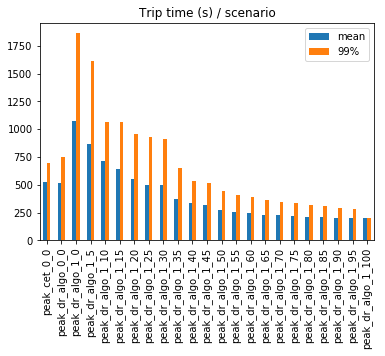

In [22]:
time_df.T[['mean', '99%']].plot(kind='bar', title='Trip time (s) / scenario')

### Highlights

- As expected, trip times decrease when the ratio of vehicles using DRs increase
- If 25% of vehicles are using DRs, the average trip time is 502s (8m22s), which is 95% of the average 526s (8m46s) using the current traffic light settings.
- If 75% of vehicles are using DRs, the average trip time is 219s (3m39s), which is 41% of the average 526s (8m46s) using the current traffic light settings.
- With 45% of vehicles using DRs, 99% of all trips have time below 515s (8m35s), which is less than of the average 526s (8m46s) using the current traffic light settings.

## Average speed

(Omitted because the results would be the same)

In [23]:
# speed_df.T[['mean', 'std', 'min', '1%', '50%', 'max']]

In [24]:
# speed_df.T[['mean', '1%']].plot(kind='bar', title='Avg speed (km/h) / scenario')

# Cars outside DR

In [25]:
trip_time_stats = []
avg_speed_stats = []

scenarios = [
    'peak_cet_0_0',
    'peak_dr_algo_0_0',
    'peak_dr_algo_1_0',
    'peak_dr_algo_1_5',
    'peak_dr_algo_1_10',
    'peak_dr_algo_1_15',
    'peak_dr_algo_1_20',
    'peak_dr_algo_1_25',
    'peak_dr_algo_1_30',
    'peak_dr_algo_1_35',
    'peak_dr_algo_1_40',
    'peak_dr_algo_1_45',
    'peak_dr_algo_1_50',
    'peak_dr_algo_1_55',
    'peak_dr_algo_1_60',
    'peak_dr_algo_1_65',
    'peak_dr_algo_1_70',
    'peak_dr_algo_1_75',
    'peak_dr_algo_1_80',
    'peak_dr_algo_1_85',
    'peak_dr_algo_1_90',
    'peak_dr_algo_1_95',
]

for s in scenarios:
    dr = parse_arrivals(dr_events_filename_template.format(s), 'regular')
    dr['avg_speed_km/h'] = 3.6 * dr['distance_m'] / dr['trip_time_s']
    dr = dr.drop(columns='distance_m')
    
    trip_time_stats.append(dr['trip_time_s'].describe(percentiles=[.01,.25,.5,.75,.99]))
    avg_speed_stats.append(dr['avg_speed_km/h'].describe(percentiles=[.01,.25,.5,.75,.99]))
    
time_df = pd.concat(trip_time_stats, axis=1, keys=scenarios)
speed_df = pd.concat(avg_speed_stats, axis=1, keys=scenarios)

## Trip time

In [26]:
time_df.T[['mean', 'std', 'min', '50%', '99%', 'max']]

,mean,std,min,50%,99%,max
peak_cet_0_0,526.269996,86.078643,334.0,526.0,698.00,763.0
peak_dr_algo_0_0,515.253778,131.774201,248.0,490.0,750.00,795.0
peak_dr_algo_1_0,1068.954478,481.235543,253.0,787.5,1861.00,1928.0
peak_dr_algo_1_5,905.795111,319.482522,253.0,773.0,1613.00,1648.0
peak_dr_algo_1_10,767.700799,210.046659,249.0,698.0,1068.18,1161.0
peak_dr_algo_1_15,723.076773,197.528111,254.0,648.0,1081.00,1205.0
peak_dr_algo_1_20,642.102074,214.976383,254.0,586.0,962.00,1088.0
peak_dr_algo_1_25,602.886704,208.997167,254.0,506.0,935.00,962.0
peak_dr_algo_1_30,630.392678,175.639659,252.0,596.0,918.04,955.0
peak_dr_algo_1_35,465.583664,93.993235,253.0,456.0,660.00,743.0


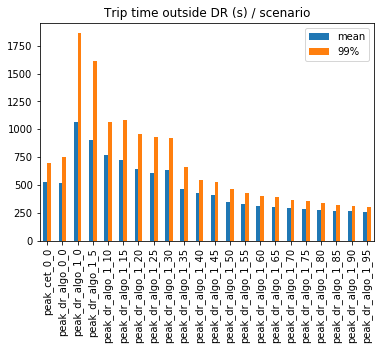

In [27]:
time_df.T[['mean', '99%']].plot(kind='bar', title='Trip time outside DR (s) / scenario')

### Highlights
- As expected (considering the velocity model we are using), trip time for vehicles outside DRs also decreases when the ratio of vehicles in DRs increases.
- If 35% of vehicles are using DRs, the average trip time for vehicles outside DRs is 466s (7m46s), which is 89% of the average 526s (8m46s) with current traffic signal settings.
- If 45% of vehicles are using DRs, 99% of the trips outside DRs take less than 522s (8m42s), which is 99% of the average 526s (8m46s) with current traffic signal settings.

## Average speed

(Omitted because the results would be the same)

In [28]:
# speed_df.T[['mean', 'std', 'min', '1%', '50%', 'max']]

In [29]:
#speed_df.T[['mean', '1%']].plot(kind='bar', title='Avg speed outside DR (km/h) / scenario')